In [1]:
# Version de python
import sys
sys.version

'3.11.10 (main, Oct  3 2024, 07:29:13) [GCC 11.2.0]'

In [2]:
# tensorflow
import tensorflow as tf
tf.__version__
tf.sysconfig.get_build_info()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-10-08 16:08:52.292860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 16:08:53.469263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-10-08 16:08:54.343971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:08:54.408842: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:08:54.409119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
# version de keras associéé
tf.keras.__version__

'3.5.0'

In [4]:
# dossier par defaut
import os
os.chdir('/home/eddi/Bureau/Personnal_project/projet_Ricco_Rakotomalala/project_model')

In [5]:
#chargement et inspection d'un image
# dossier par defaut
import matplotlib.pyplot as plt
f = open('images/train/Rakotonimanana_Eddi/20240118_173836.jpg', "rb")
image = plt.imread(f)

# type
type(image)

numpy.ndarray

In [6]:
# dimension de l'image 
image.shape

(1932, 2576, 3)

In [7]:
# valeurs min et max
import numpy as np
print(f"Min = {np.min(image)}")
print(f"Max = {np.max(image)}")

Min = 0
Max = 255


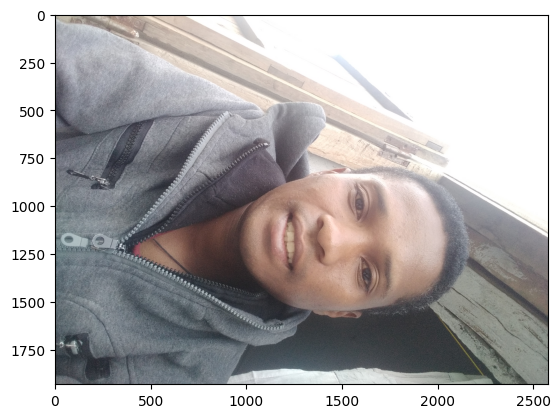

In [8]:
# affichage
plt.imshow(image)

#### chargement et inspection de la base train

-   Outil pour chargement du flux d'image train
-   Structure iterable
-   Normalisation des valeurs des pixels entre 0 et 1
-   harmonisation des definitions en (128,128)
-   chargement individuel (batch_size = 1)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale = 1.0/255)

# parser le dossier train
train_image_gen = image_gen.flow_from_directory(
    directory = "images/train/",
    target_size = (128,128),
    color_mode = "rgb",
    shuffle = True,
    batch_size = 1
)

Found 30 images belonging to 2 classes.


In [10]:
# type de structure
type(train_image_gen)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [11]:
# classe d'appartenances
train_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
# nom des classes
train_image_gen.class_indices

{'Rakotonimanana_Eddi': 0, 'Rakotonimanana_Jennie': 1}

In [13]:
# Sauvegarde des encodages dans un fichier JSON
import json

encodings_dict = train_image_gen.class_indices

# Sauvegarder les encodages dans un fichier JSON
with open('face_encodings.json', 'w') as f:
    json.dump(encodings_dict, f)

In [14]:
# accès à une image de la structure itérable
image, label = next(train_image_gen)

-   attention à la structure de label
-   codage disjonctif complet 0/1
-   colonne 0 : eddi / colonne 1 : lucia

In [15]:
print(label)

[[0. 1.]]


In [16]:
# voir l'indice de classe d'appartenance
np.argmax(np.array(label))

1

In [17]:
# type de l'image
type(image)

numpy.ndarray

In [18]:
# dimension de l'image ici -- avec une dimension supplementaire (conseq. batch_size)
image.shape

(1, 128, 128, 3)

In [19]:
# retirer le dimension 1 et reafficher la nouvelle dimension
image.squeeze().shape

(128, 128, 3)

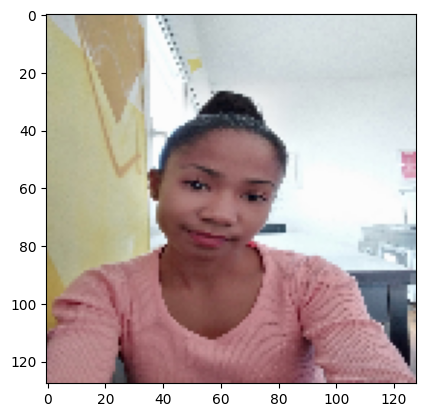

In [20]:
# affichage de l'image
plt.imshow(image.squeeze())

## CNN

In [21]:
# Construction du réseau -- définir les différentes couches
from tensorflow.keras import layers

# définition de CNN 
#utilisation de sequentielle ici
# mais on pourrait faire autrement avec model voir https://keras.io/models/model/

mon_cnn = tf.keras.Sequential()

# 1 : dimension image en entrée
mon_cnn.add(tf.keras.Input(shape=(128,128,3)))

#convolution
mon_cnn.add(layers.Conv2D(filters=6, kernel_size = 5, activation = 'relu'))
mon_cnn.add(layers.MaxPool2D(pool_size = (2,2)))
mon_cnn.add(layers.Conv2D(filters=16, kernel_size = 5, activation = 'relu'))
mon_cnn.add(layers.MaxPool2D(pool_size = (2,2)))

#flatte,
mon_cnn.add(layers.Flatten())

# couches denses
mon_cnn.add(layers.Dense(120,activation = "relu"))
mon_cnn.add(layers.Dense(84,activation = "relu"))

# couche de sortie avec fn de transfert softmax
mon_cnn.add(layers.Dense(2,activation = "softmax"))

#verification
mon_cnn.summary()

2024-10-08 16:08:56.591545: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:08:56.591850: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 16:08:56.592063: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,046 (6.21 MB)

 Trainable params: 1,628,046 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

### Paramétrage de l'entrainement

-   Paramétrage de l'entrainement
-   algo d'optimisation
-   fonction de perte
-   performance à suivre durant l'optimisation

In [22]:
mon_cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

### entrainement du modèle

In [23]:
resultat = mon_cnn.fit(train_image_gen, epochs=15)

Epoch 1/15


/home/eddi/anaconda3/envs/tensorflow_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728392940.192380  132037 service.cc:145] XLA service 0x70e674005770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728392940.192444  132037 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-10-08 16:09:00.241971: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-08 16:09:00.495575: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8

 5/30 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4567 - loss: 1.4056

I0000 00:00:1728392942.066479  132037 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4077 - loss: 1.0032
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9212 - loss: 0.5860
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7866 - loss: 0.4434
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9624 - loss: 0.1312
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7369 - loss: 0.4788
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0619
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0046
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 4.2803e-04
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 4.7994e-04
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 3.2400e-04
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy

### Verification du classement pour chaque image

[[1. 0.]]


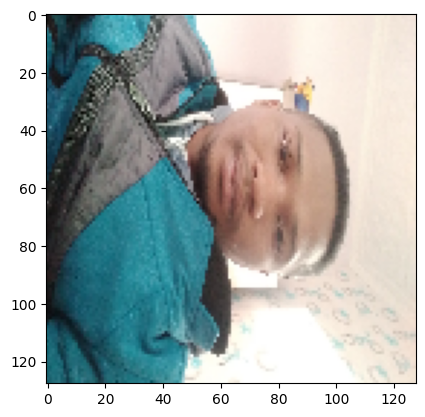

In [24]:
# application sur une image
image, label = next(train_image_gen)

#affichage de l'etiquette
print(label)

# affichage de l'mage
plt.imshow(image.squeeze())

In [25]:
# prédiction
pred = mon_cnn.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
[[9.999690e-01 3.097706e-05]]


### Evaluation sur la base test

In [26]:
# parser le dossier test
test_image_gen = image_gen.flow_from_directory(
    directory = "images/test/",
    target_size = (128,128),
    color_mode = "rgb",
    shuffle = False,
    batch_size = 1
)

Found 24 images belonging to 2 classes.


In [27]:
# Nombre d'individu dans la base de test
test_image_gen.n

24

#### Evaluation -- Calcul de l'accuracy

In [28]:
# Structure pour stocker classe prédire et classe réelle
list_pred = []
list_real = []

# itérer sur chaque individu
for i in range(test_image_gen.n):
    #image et etiquette de l'individu
    image, label =next(test_image_gen)

    # prédiction du réseau
    sortie = mon_cnn.predict(image)

    # en déduire la classe attribuée
    pred = np.argmax(np.array(sortie))

    # et la classe réelle
    real = np.argmax(np.array(label))

    #stocker
    list_pred.append(pred)
    list_real.append(real)

#affichages
print("Prédiction : ")
print(list_pred)
    
print("Appartenance réelle : ")
print(list_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prédiction : 
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
A

In [29]:
# Accuracy
acc = np.mean((np.array(list_pred)==np.array(list_real)))
print(acc)

0.6666666666666666


In [30]:
# Sauvegader le modèle
mon_cnn.save('model_face_recognition.h5')